In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import logging 
logging.basicConfig(level=logging.INFO)

In [3]:
path="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/test.nc"
ds= xr.open_dataset(path)
ds

<xarray.Dataset> Size: 0B
Dimensions:  ()
Data variables:
    *empty*

In [2]:
models=["CanESM5", "ACCESS-CM2", "HadGEM3-GC31-MM"]

In [3]:
# Define the smallest overlapping range
lon_min = -12  # Take the larger of the two minimums
lon_max = 35  # Take the smaller of the two maximums
lat_min = 33  # Take the larger of the two minimums
lat_max = 64.8  # Take the smaller of the two maximums

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


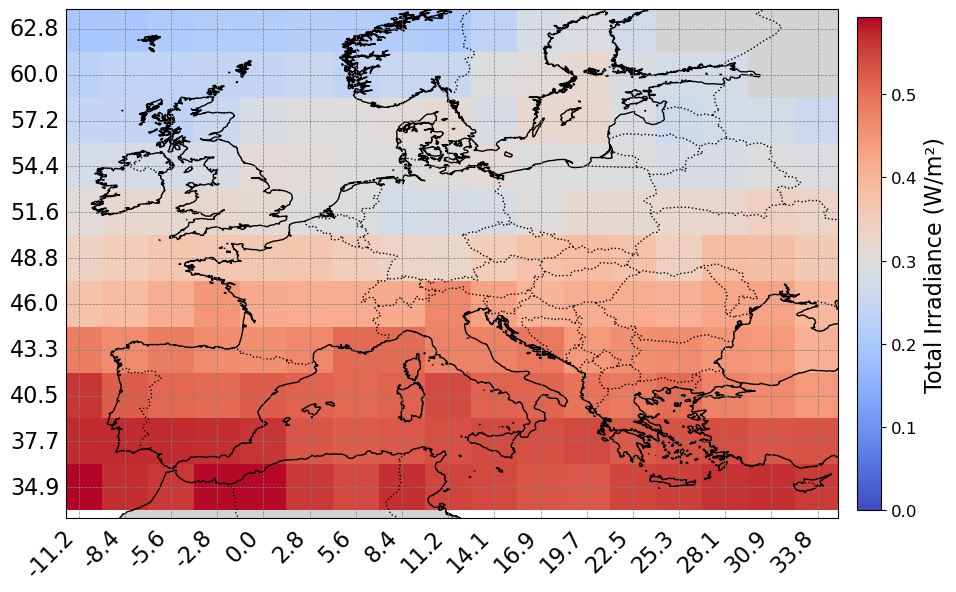

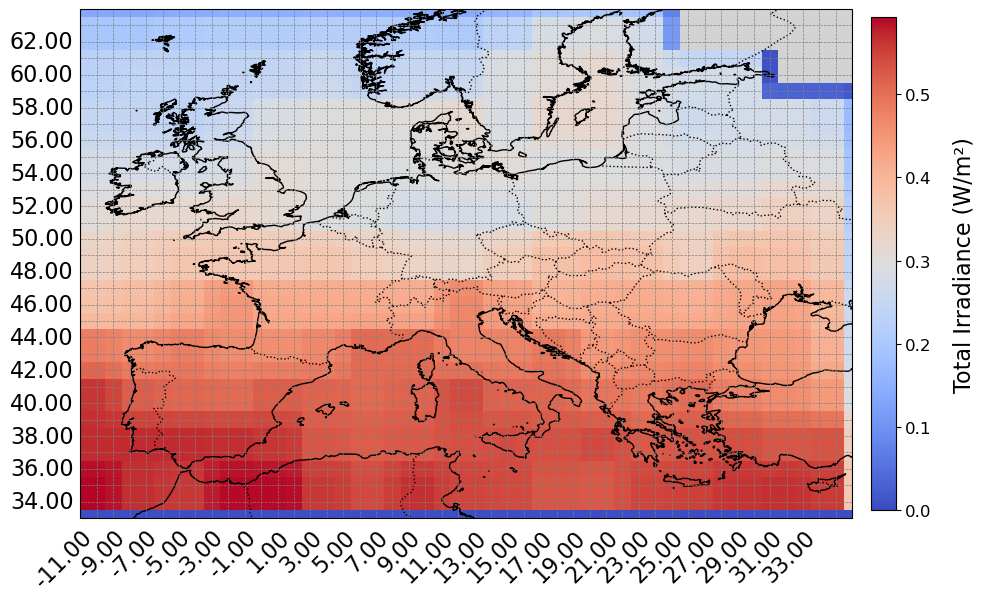

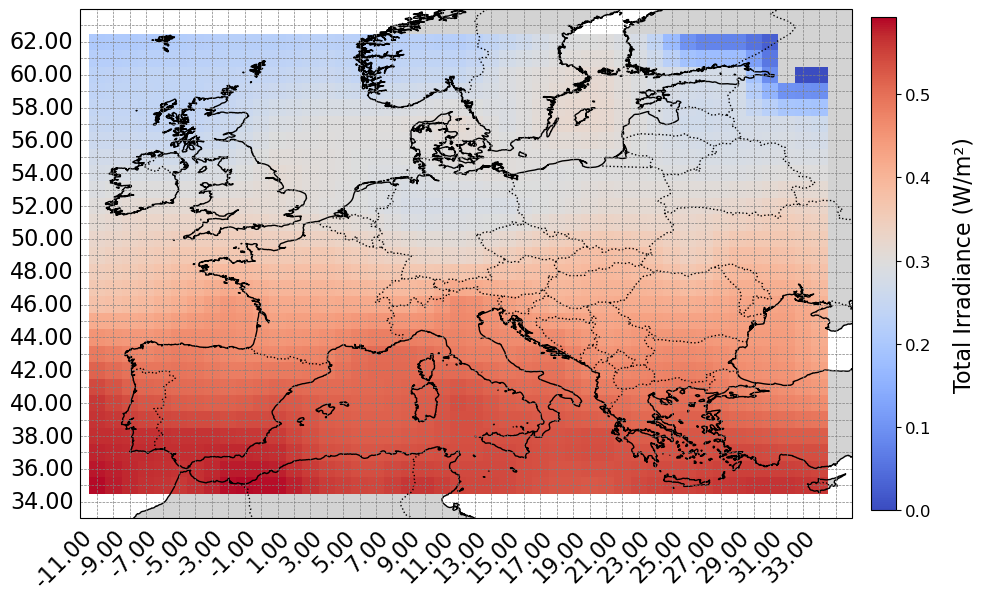

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


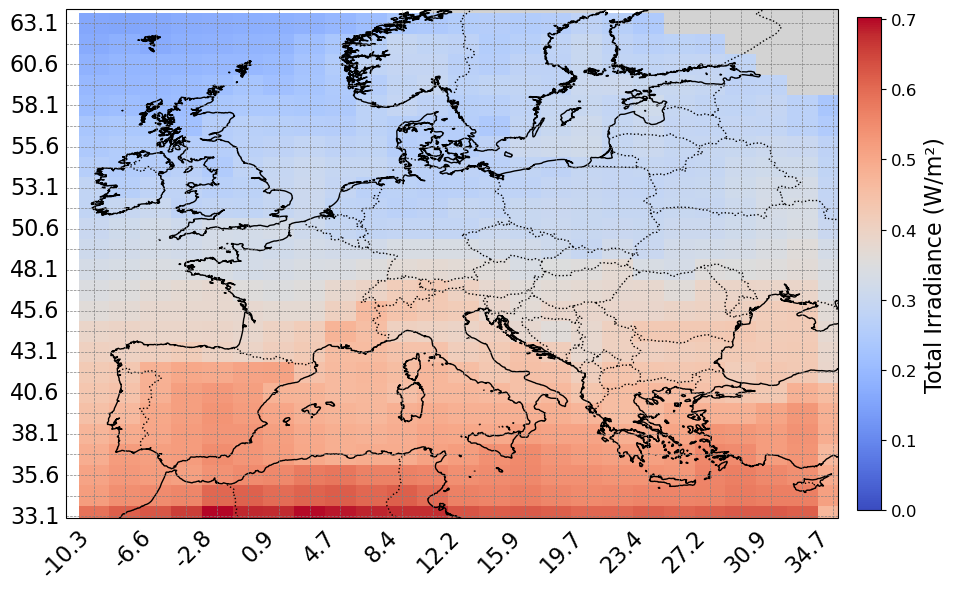

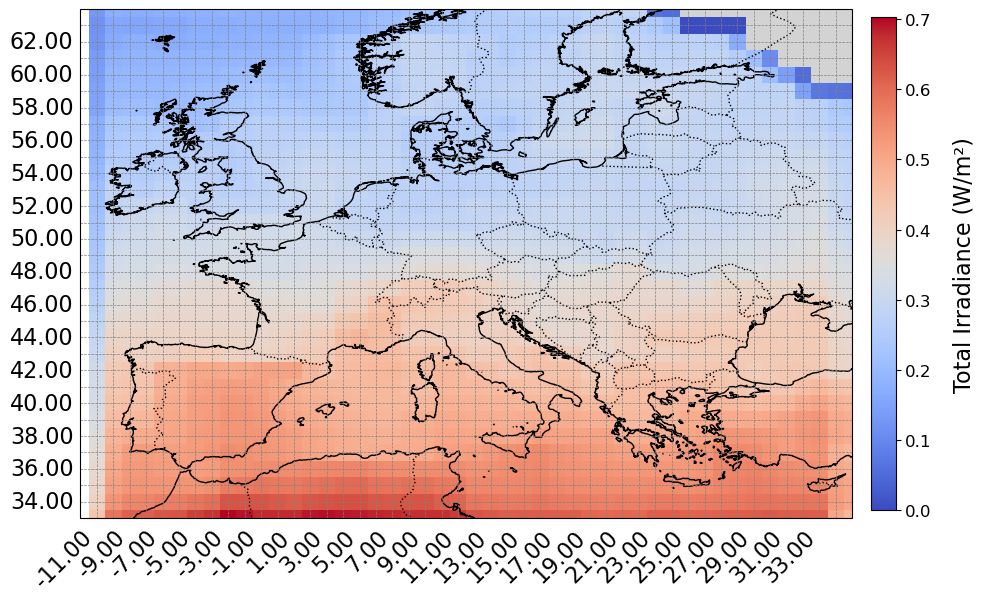

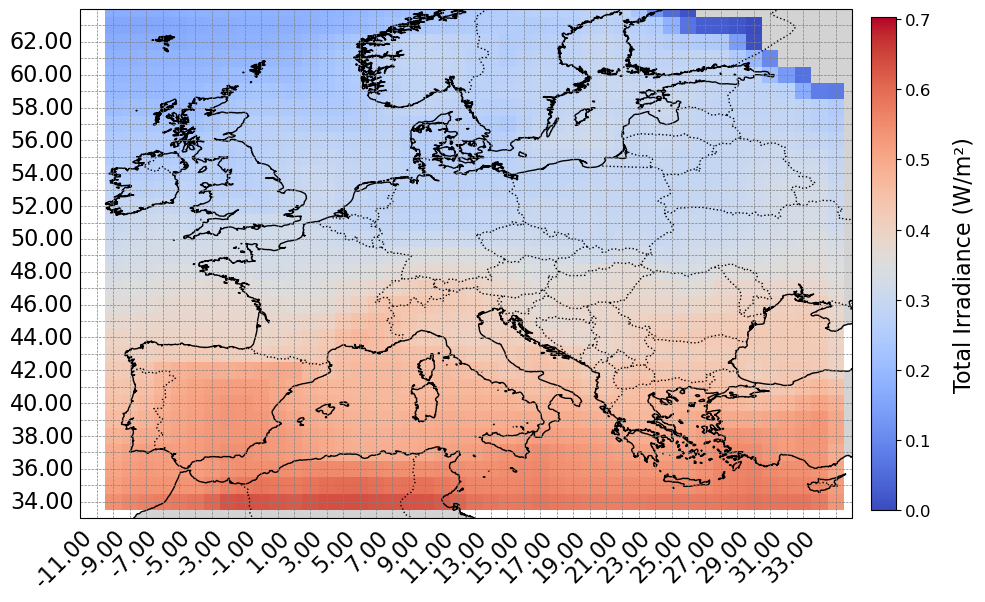

/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')
/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/smm.py:131: UserWarning: Input array is not C_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not C_CONTIGUOUS. ' 'Will affect performance.')


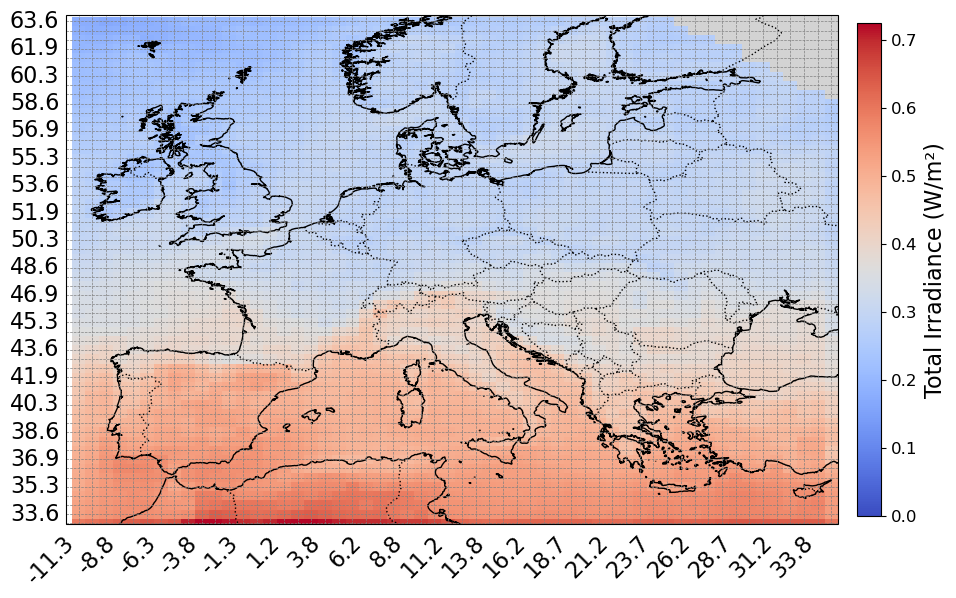

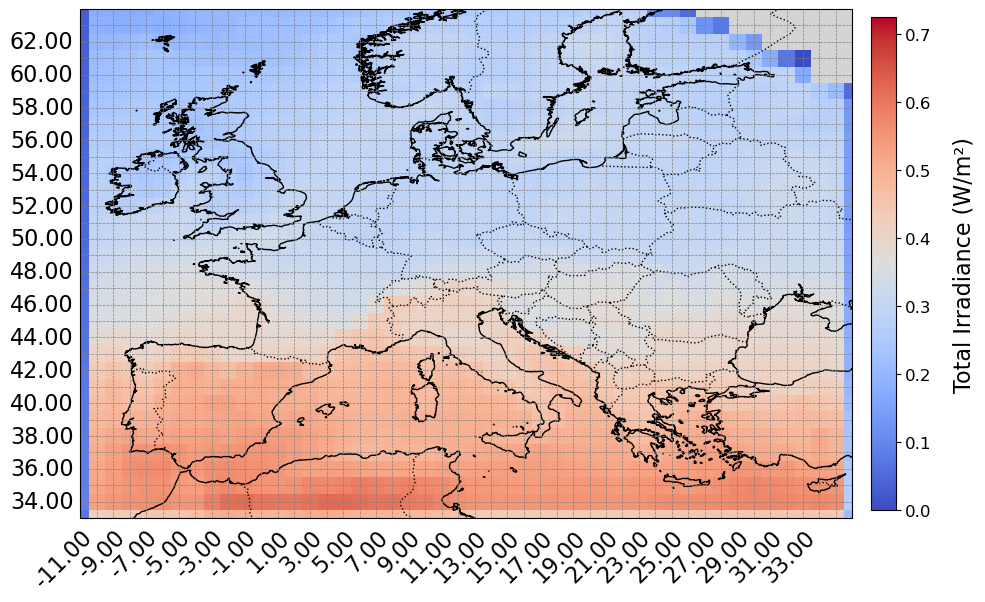

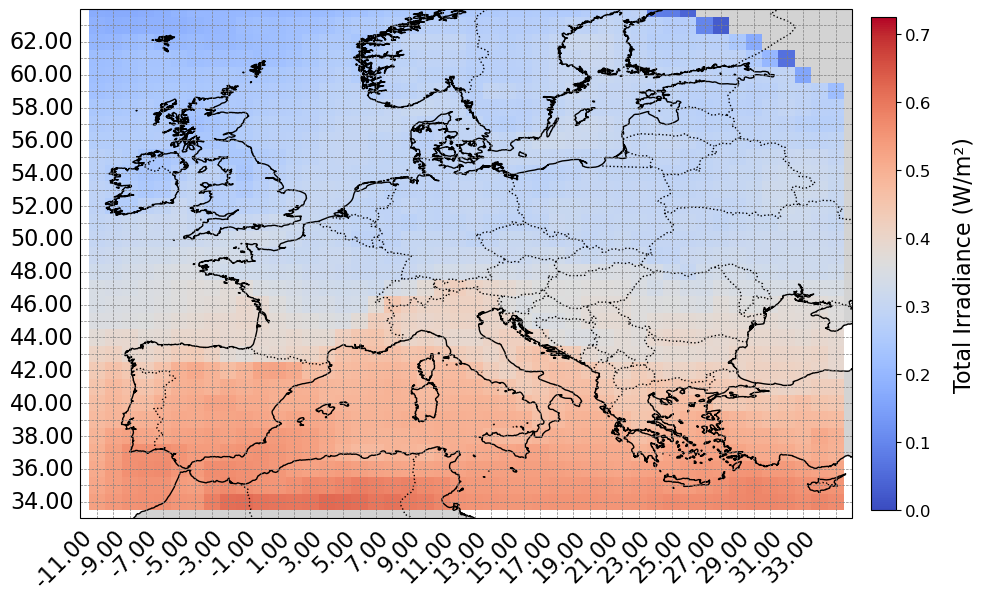

In [3]:
from regridding_functions import read_and_average_cmip_power_BOC
from regridding_functions import regrid
import xesmf as xe
from plots import map_plots, map_plots_lon


for model in models:
    diri=f"/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/power/{model}/historical/solar_power_1980.nc"
    ds_in=xr.open_dataset(diri)
    ds_out="/work/users/s233224/Climate-Change-Impacted-Solar-Energy-Generation-backup/europe_1x1.nc"
    ds_out=xr.open_dataset(ds_out)
    regridder_cons = xe.Regridder(ds_in, ds_out, method='conservative', periodic=False)
    regridded_ds_cons = regridder_cons(ds_in)
    regridder_bi = xe.Regridder(ds_in, ds_out, method='bilinear', periodic=False)
    regridded_ds_bi = regridder_bi(ds_in)

    annual_power_orig=ds_in['specific generation'].mean(dim='time')
    annual_power_cons=regridded_ds_cons['specific generation'].mean(dim='time')
    annual_power_bi=regridded_ds_bi['specific generation'].mean(dim='time')
    vmin=min(annual_power_cons.min(), annual_power_bi.min(), annual_power_orig.min())
    vmax=max(annual_power_cons.max(), annual_power_bi.max(), annual_power_orig.max())
    map_plots_lon(annual_power_orig, cmap='coolwarm', setnan=True, vmin=vmin, vmax=vmax, title=None, label='Total Irradiance (W/m²)')
    map_plots(annual_power_cons, cmap='coolwarm',setnan=True, vmin=vmin, vmax=vmax, title=None, label='Total Irradiance (W/m²)')
    map_plots(annual_power_bi, cmap='coolwarm', setnan=True, vmin=vmin, vmax=vmax, title=None, label='Total Irradiance (W/m²)')

In [6]:
from regridding_functions import read_and_average_era5_marta
from regridding_functions import read_and_average_cmip
mean_rsds_era5_BOC=read_and_average_era5_marta('influx_direct').sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))   
mean_rsdsdiff_era5_BOC=read_and_average_era5_marta('influx_diffuse').sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

['/groups/EXTREMES/cutouts/europe-1980-era5.nc', '/groups/EXTREMES/cutouts/europe-1981-era5.nc', '/groups/EXTREMES/cutouts/europe-1982-era5.nc', '/groups/EXTREMES/cutouts/europe-1983-era5.nc', '/groups/EXTREMES/cutouts/europe-1984-era5.nc', '/groups/EXTREMES/cutouts/europe-1985-era5.nc', '/groups/EXTREMES/cutouts/europe-1986-era5.nc', '/groups/EXTREMES/cutouts/europe-1987-era5.nc', '/groups/EXTREMES/cutouts/europe-1988-era5.nc', '/groups/EXTREMES/cutouts/europe-1989-era5.nc', '/groups/EXTREMES/cutouts/europe-1990-era5.nc', '/groups/EXTREMES/cutouts/europe-1991-era5.nc', '/groups/EXTREMES/cutouts/europe-1992-era5.nc', '/groups/EXTREMES/cutouts/europe-1993-era5.nc', '/groups/EXTREMES/cutouts/europe-1994-era5.nc', '/groups/EXTREMES/cutouts/europe-1995-era5.nc', '/groups/EXTREMES/cutouts/europe-1996-era5.nc', '/groups/EXTREMES/cutouts/europe-1997-era5.nc', '/groups/EXTREMES/cutouts/europe-1998-era5.nc', '/groups/EXTREMES/cutouts/europe-1999-era5.nc', '/groups/EXTREMES/cutouts/europe-2000-e

In [7]:
mean_rsds_era5_BOC=mean_rsds_era5_BOC.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))  
mean_rsdsdiff_era5_BOC=mean_rsdsdiff_era5_BOC.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max)) 

In [8]:
mean_rsds_model_BOC=read_and_average_cmip('SFCRAD/CanESM5/historical/r1i1p2f1/',"rsds")
mean_rsdsdiff_model_BOC=read_and_average_cmip('SFCRAD/CanESM5/historical/r1i1p2f1/',"rsdsdiff")

['/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1980.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1981.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1982.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1983.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1984.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1985.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1986.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1987.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1988.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1989.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1990.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1991.nc', '/g

['/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1980.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1981.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1982.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1983.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1984.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1985.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1986.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1987.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1988.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1989.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1990.nc', '/groups/FutureWind/SFCRAD/CanESM5/historical/r1i1p2f1/rsds_rsdsdiff_tas_1991.nc', '/g

In [9]:
mean_rsds_model_BOC=mean_rsds_model_BOC.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
mean_rsdsdiff_model_BOC=mean_rsdsdiff_model_BOC.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

In [10]:
# Find the min and max lat/lon for each dataset
lon_min_era5 = mean_rsds_era5_BOC.lon.min().values
lon_max_era5 = mean_rsds_era5_BOC.lon.max().values
lat_min_era5 = mean_rsds_era5_BOC.lat.min().values

lon_min_model = mean_rsds_model_BOC.lon.min().values
lon_max_model = mean_rsds_model_BOC.lon.max().values
lat_min_model = mean_rsds_model_BOC.lat.min().values

# Define the smallest overlapping range
lon_min = -12  # Take the larger of the two minimums
lon_max = 35  # Take the smaller of the two maximums
lat_min = 33  # Take the larger of the two minimums
lat_max = 64.8  # Take the smaller of the two maximums

print(f"Smallest overlapping longitude range: {lon_min} to {lon_max}")
print(f"Smallest overlapping latitude range: {lat_min} to {lat_max}")

# Subset the datasets to the smallest overlapping range
mean_rsds_era5_BOC= mean_rsds_era5_BOC.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))
mean_rsdsdiff_era5_BOC= mean_rsdsdiff_era5_BOC.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

mean_rsds_model_BOC = mean_rsds_model_BOC.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))
mean_rsdsdiff_model_BOC = mean_rsdsdiff_model_BOC.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))


Smallest overlapping longitude range: -12 to 35
Smallest overlapping latitude range: 33 to 64.8


Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


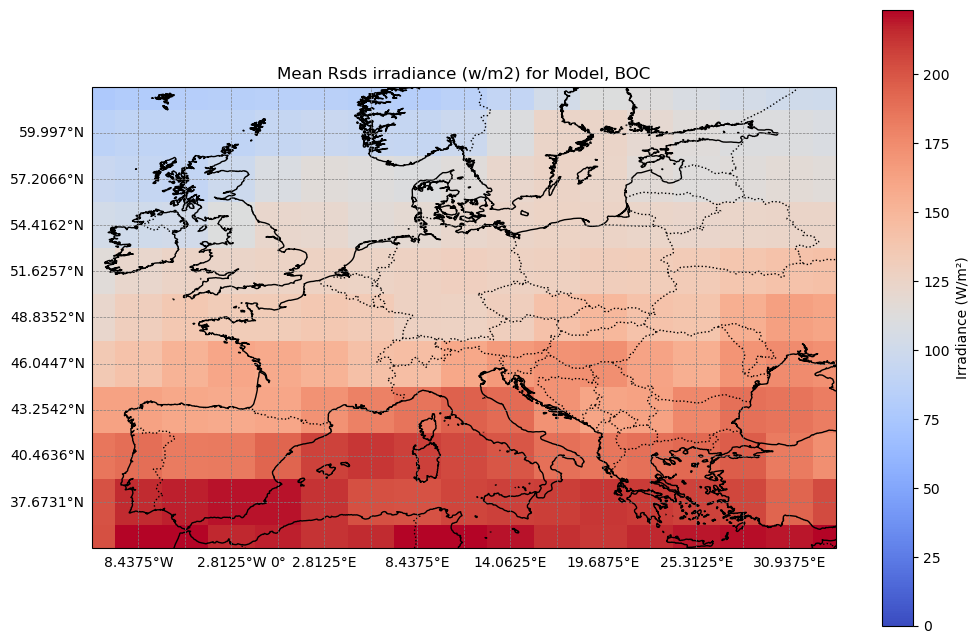

In [ ]:
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values

lon_era5=mean_rsds_model_BOC.lon.values
lat_era5=mean_rsds_model_BOC.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(mean_rsds_model_BOC, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(mean_rsds_model_BOC, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, mean_rsds_model_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Mean Rsds irradiance (w/m2) for Model, BOC")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


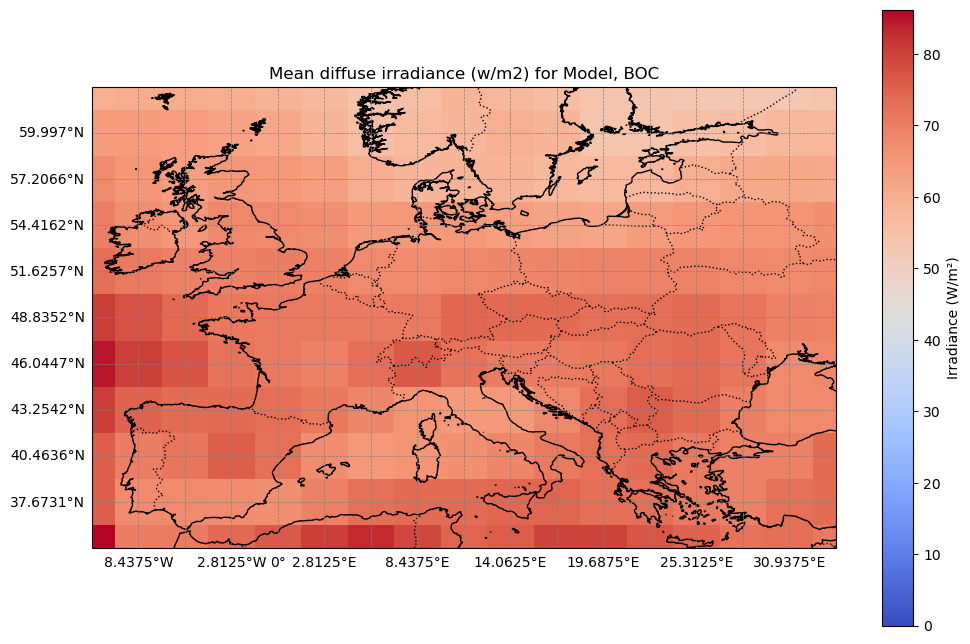

In [ ]:
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values

lon_era5=mean_rsds_model_BOC.lon.values
lat_era5=mean_rsds_model_BOC.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(mean_rsds_model_BOC, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(mean_rsds_model_BOC, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, mean_rsdsdiff_model_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0, # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Mean diffuse irradiance (w/m2) for Model, BOC")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

In [11]:
from regridding_functions import regrid
regridder_mean_rsds_era5_BOC = regrid(mean_rsds_era5_BOC, mean_rsds_model_BOC, method="conservative")
regrid_mean_rsds_era5_BOC=regridder_mean_rsds_era5_BOC(mean_rsds_era5_BOC)


189 190
128 129
17 18
11 12


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_direct as the horizontal dimensions for the regridding.
  warnings.warn(


In [ ]:
from regridding_functions import regrid
regridder_mean_rsdsdiff_era5_BOC = regrid(mean_rsdsdiff_era5_BOC, mean_rsdsdiff_model_BOC, method="conservative")
regrid_mean_rsdsdiff_era5_BOC=regridder_mean_rsdsdiff_era5_BOC(mean_rsdsdiff_era5_BOC)

189 190
128 129
17 18
11 12


/home/s233224/anaconda3/envs/atlite_cmip6_2025/lib/python3.13/site-packages/xesmf/frontend.py:718: UserWarning: Using dimensions ('y', 'x') from data variable influx_diffuse as the horizontal dimensions for the regridding.
  warnings.warn(


Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


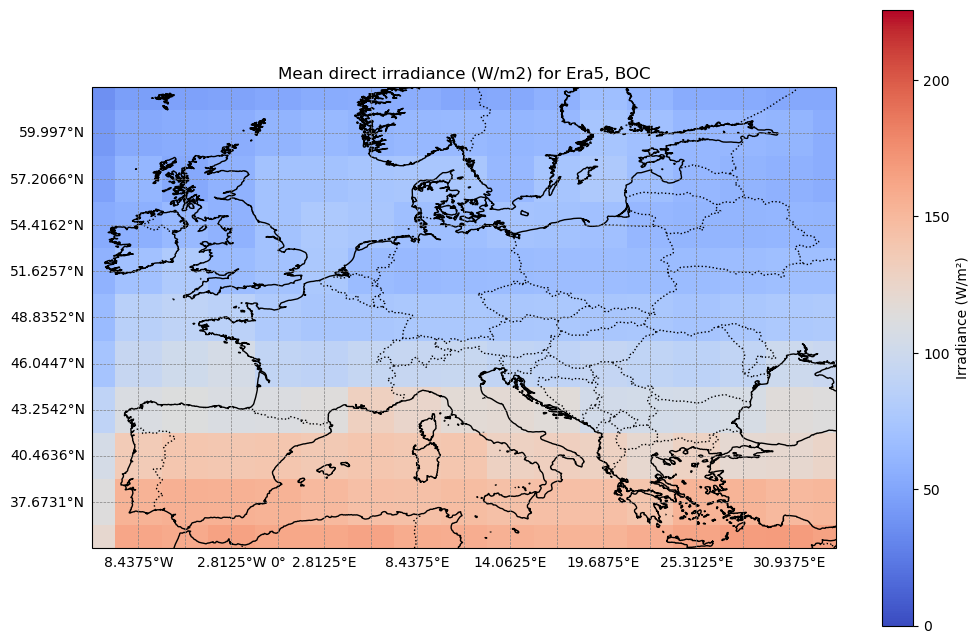

In [ ]:
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = regrid_mean_rsds_era5_BOC.lon.values 
lat = regrid_mean_rsds_era5_BOC.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), regrid_mean_rsds_era5_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), regrid_mean_rsds_era5_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(regrid_mean_rsds_era5_BOC, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(regrid_mean_rsds_era5_BOC, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")
# Compute the maximum value for the colorbar explicitly
vmax = max(regrid_mean_rsds_era5_BOC.max().compute(), mean_rsds_model_BOC.max().compute())  # Ensure both are computed

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, regrid_mean_rsds_era5_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Mean direct irradiance (W/m2) for Era5, BOC")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

In [ ]:
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = regrid_mean_rsdsdiff_era5_BOC.lon.values 
lat = regrid_mean_rsdsdiff_era5_BOC.lat.values

# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), regrid_mean_rsdsdiff_era5_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), regrid_mean_rsdsdiff_era5_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

# Use percentiles to remove outliers
vmin = np.nanpercentile(regrid_mean_rsdsdiff_era5_BOC, 2)  # 2nd percentile (lower bound)
vmax = np.nanpercentile(regrid_mean_rsdsdiff_era5_BOC, 98)  # 98th percentile (upper bound)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")
# Compute the maximum value for the colorbar explicitly
vmax = max(regrid_mean_rsds_era5_BOC.max().compute(), regrid_mean_rsdsdiff_era5_BOC.max().compute())  # Ensure both are computed

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, regrid_mean_rsdsdiff_era5_BOC,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',  # Colormap for bias factor
    shading='auto',
    vmin=0, vmax=vmax  # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Mean diffuse irradiance (W/m2) for Era5, BOC")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Irradiance (W/m²)')

plt.show()

Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


KeyboardInterrupt: 

In [ ]:
direct_numerator_era5_model=regrid_mean_rsds_era5_BOC.values
direct_denominator_era5_model=(mean_rsds_model_BOC.values)-(mean_rsdsdiff_model_BOC.values)
# Ensure valid bias factor calculation
mask_valid_direct = (direct_denominator_era5_model != 0) & (direct_numerator_era5_model != 0)  # Avoid values 0 
direct_bias_factor_era5_model = np.where(mask_valid_direct, direct_numerator_era5_model / direct_denominator_era5_model, np.nan)  # Replace invalid cases with NaN
direct_bias_factor_era5_model

NameError: name 'regrid_mean_rsds_era5_BOC' is not defined

Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


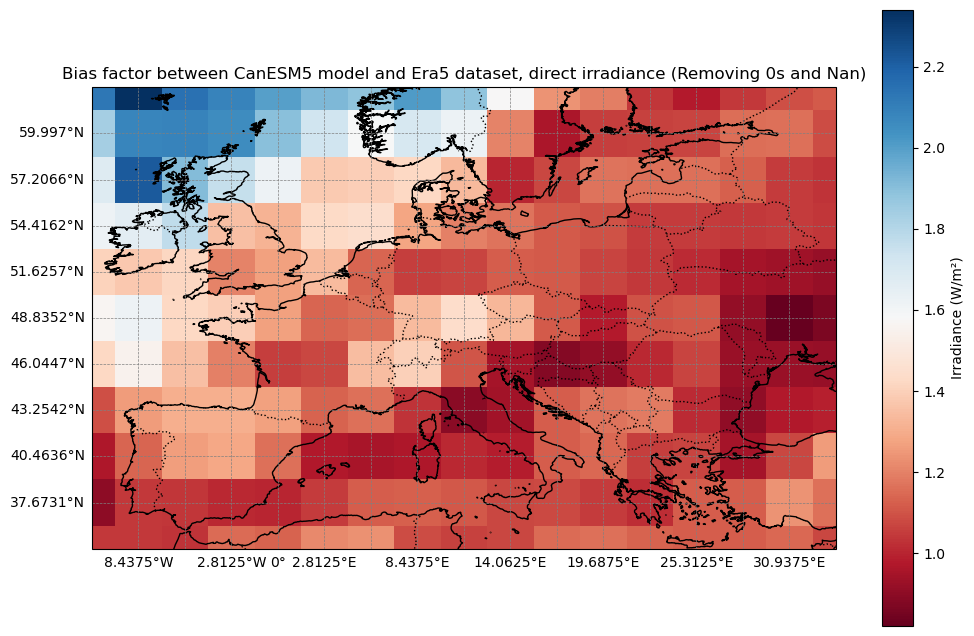

In [ ]:
#comparison between model BoC without and with the bias factor
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, direct_bias_factor_era5_model,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='RdBu',  # Colormap for bias factor
    shading='auto', # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Bias factor between CanESM5 model and Era5 dataset, direct irradiance (Removing 0s and Nan)")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show()

In [22]:
print(direct_bias_factor_era5_model.mean())

1.2382979


In [27]:
diffuse_numerator_era5_model=regrid_mean_rsdsdiff_era5_BOC.values
diffuse_denominator_era5_model=mean_rsdsdiff_model_BOC.values
# Ensure valid bias factor calculation
mask_valid_diffuse= (diffuse_denominator_era5_model != 0) & (diffuse_numerator_era5_model != 0)  # Avoid values 0 
diffuse_bias_factor_era5_model = np.where(mask_valid_diffuse, diffuse_numerator_era5_model / diffuse_denominator_era5_model, np.nan)  # Replace invalid cases with NaN
diffuse_bias_factor_era5_model

array([[0.5955414 , 0.8231676 , 0.80814487, 0.7836007 , 0.80066293,
        0.77365553, 0.74822825, 0.79592115, 0.7994551 , 0.7869262 ,
        0.75407106, 0.75578576, 0.768255  , 0.76860714, 0.77746797,
        0.7642757 , 0.7802947 ],
       [0.658233  , 0.8163534 , 0.80051124, 0.8303416 , 0.8395875 ,
        0.82253695, 0.80473304, 0.7981884 , 0.79307723, 0.7944447 ,
        0.78141874, 0.8009198 , 0.8076827 , 0.79914224, 0.81289184,
        0.820015  , 0.8124667 ],
       [0.63684016, 0.7830158 , 0.769352  , 0.754933  , 0.77226764,
        0.84229773, 0.87725574, 0.8746233 , 0.85573465, 0.8591308 ,
        0.8207883 , 0.80927485, 0.8082976 , 0.8233533 , 0.8596884 ,
        0.87922645, 0.8340507 ],
       [0.6109162 , 0.7742239 , 0.7939118 , 0.7879879 , 0.78460664,
        0.80103326, 0.8057246 , 0.84676343, 0.88422394, 0.88630915,
        0.8458226 , 0.82904005, 0.7991844 , 0.809852  , 0.85713184,
        0.8740795 , 0.8604372 ],
       [0.59200245, 0.75376654, 0.75976986, 0.785994

In [29]:
print(diffuse_bias_factor_era5_model.mean())

0.80461735


Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


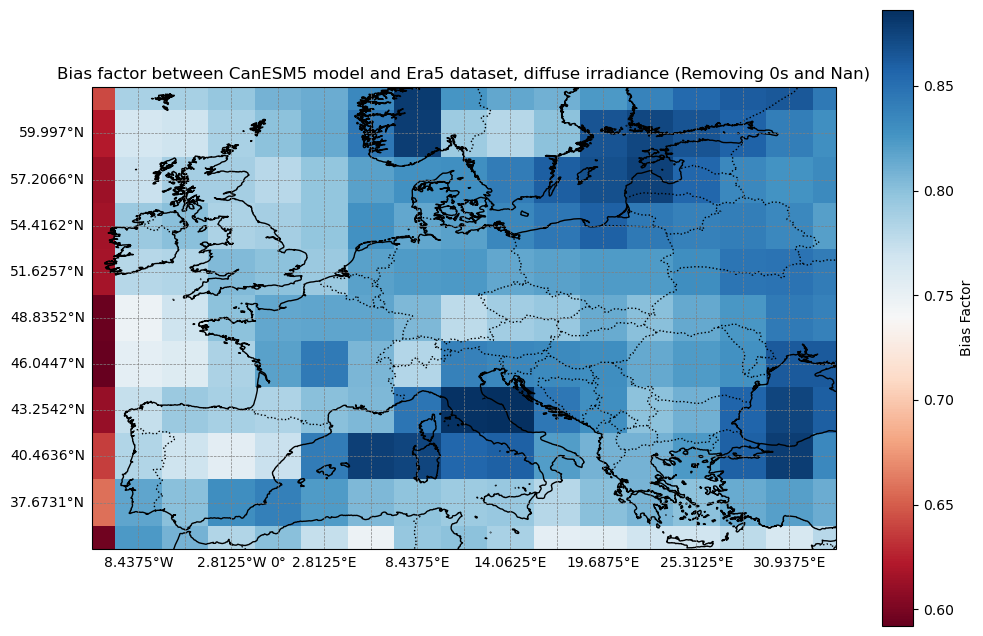

In [30]:
#comparison between model BoC without and with the bias factor
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, diffuse_bias_factor_era5_model,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='RdBu',  # Colormap for bias factor
    shading='auto', # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Bias factor between CanESM5 model and Era5 dataset, diffuse irradiance (Removing 0s and Nan)")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias Factor')

plt.show()

In [23]:
total_numerator_era5_model=regrid_mean_rsds_era5_BOC.values+regrid_mean_rsdsdiff_era5_BOC.values
total_denominator_era5_model=mean_rsds_model_BOC.values
# Ensure valid bias factor calculation
mask_valid_total= (total_denominator_era5_model != 0) & (total_numerator_era5_model != 0)  # Avoid values 0 
total_bias_factor_era5_model = np.where(mask_valid_total, total_numerator_era5_model / total_denominator_era5_model, np.nan)  # Replace invalid cases with NaN
total_bias_factor_era5_model

array([[0.8523762 , 0.97437537, 0.96288097, 1.0259892 , 1.0173404 ,
        1.049364  , 1.044987  , 0.98444206, 0.97379065, 0.97409135,
        1.0012482 , 1.0091044 , 1.0018976 , 0.99972796, 1.0099937 ,
        1.0189458 , 0.9793682 ],
       [0.81129074, 0.9704351 , 0.9619397 , 0.95475024, 0.9523848 ,
        0.9733568 , 1.0055516 , 1.0048327 , 0.9959038 , 0.97241586,
        0.9739069 , 0.96231216, 0.9479181 , 1.0099841 , 1.0158885 ,
        1.0803481 , 1.0360191 ],
       [0.83083993, 1.0047749 , 1.0674481 , 1.0667915 , 1.0137886 ,
        0.9317206 , 0.92888576, 0.9369194 , 0.95686406, 0.94282675,
        1.0058986 , 1.0137302 , 0.95912635, 0.9751439 , 0.91506594,
        0.9977254 , 1.0779566 ],
       [0.85171324, 1.0334057 , 1.0689951 , 1.0641987 , 1.0475047 ,
        0.9953306 , 1.0276817 , 0.9666441 , 0.89199394, 0.9234525 ,
        1.0116067 , 1.0130211 , 1.0066124 , 0.92786795, 0.8873639 ,
        0.9345447 , 0.9415062 ],
       [0.9053565 , 1.0969836 , 1.0509018 , 1.012047

In [31]:
print(total_bias_factor_era5_model.mean())

0.9982109


Longitude range: -11.25 to 33.75
Latitude range: 34.88252258300781 to 62.787353515625


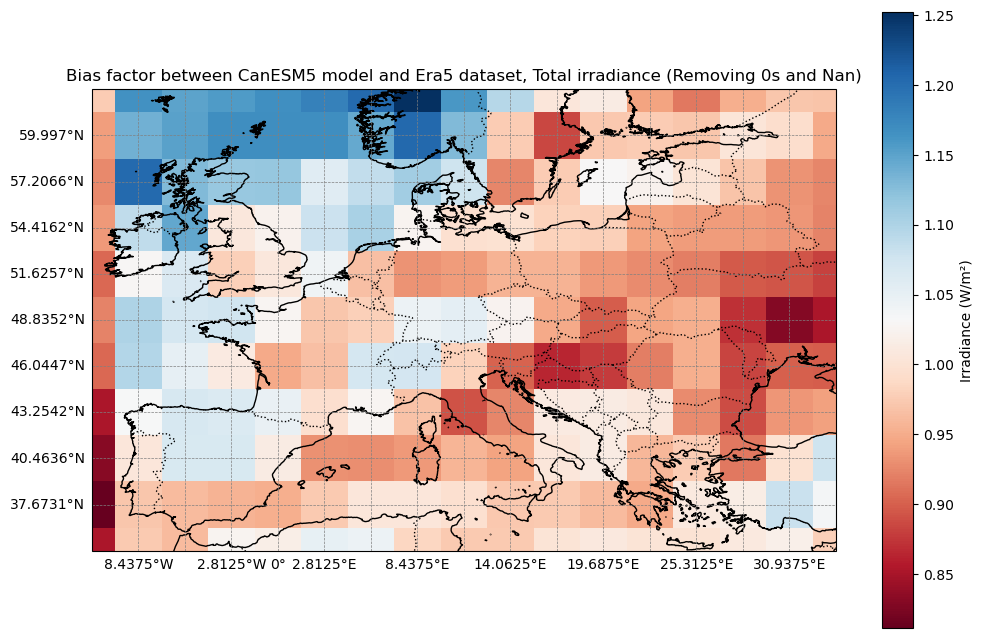

In [ ]:
#comparison between model BoC without and with the bias factor
# Check if the biased_values shape matches lon2d, lat2d
# Get lat/lon values
lon = mean_rsds_model_BOC.lon.values 
lat = mean_rsds_model_BOC.lat.values


# Ensure lon/lat are 2D using meshgrid
# Ensure lon/lat are 2D using meshgrid
lon_edges = np.linspace(lon.min(), lon.max(), mean_rsds_model_BOC.shape[1] )
lat_edges = np.linspace(lat.min(), lat.max(), mean_rsds_model_BOC.shape[0] )
lon2d, lat2d = np.meshgrid(lon_edges, lat_edges)

lon_min, lon_max = lon.min(), lon.max()
lat_min, lat_max = lat.min(), lat.max()
print(f"Longitude range: {lon_min} to {lon_max}")
print(f"Latitude range: {lat_min} to {lat_max}")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
# Set the exact extent to match the dataset boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Plot the bias factor (masked)
c = ax.pcolormesh(
    lon2d, lat2d, total_bias_factor_era5_model,  # Ensure correct shapes
    transform=ccrs.PlateCarree(),
    cmap='RdBu',  # Colormap for bias factor
    shading='auto', # Clip extreme outliers
)

# Add map features
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.set_title("Bias factor between CanESM5 model and Era5 dataset, Total irradiance (Removing 0s and Nan)")

gridlines = ax.gridlines(
    draw_labels=True, 
    linewidth=0.5, 
    color='gray', 
    linestyle='--', 
    xlocs=lon, 
    ylocs=lat, 
    x_inline=False, 
    y_inline=False
)
gridlines.top_labels = False  # Disable labels on the top
gridlines.right_labels = False  # Disable labels on the right

# Add colorbar
cbar = fig.colorbar(c, ax=ax, orientation='vertical', label='Bias factor')

plt.show()